In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)
X.head()
print(X)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


TypeError: unhashable type: 'numpy.ndarray'

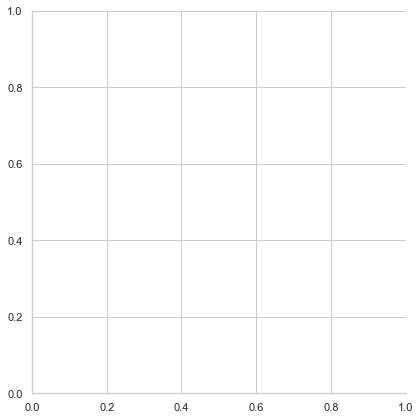

In [3]:
import seaborn as sns
 
 
# style used as a theme of graph 
# for example if we want black 
# graph with grid then write "darkgrid"
sns.set_style("whitegrid")
 
# sepal_length, petal_length are iris
# feature data height used to define
# Height of graph whereas hue store the
# class of iris dataset.
sns.FacetGrid(iris, height = 6).map(plt.scatter, 'sepal_length', 'petal_length').add_legend()

In [4]:
df = X.join(pd.Series(y, name='class'))
print(df)
class_feature_means = pd.DataFrame(columns=iris.target_names)
for c, rows in df.groupby('class'):
    class_feature_means[c] = rows.mean()
class_feature_means

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

         class  
0       se

,setosa,versicolor,virginica
sepal length (cm),5.006,5.936,6.588
sepal width (cm),3.428,2.770,2.974
petal length (cm),1.462,4.260,5.552
petal width (cm),0.246,1.326,2.026


In [5]:
within_class_scatter_matrix = np.zeros((4,4))
for c, rows in df.groupby('class'):
    rows = rows.drop(['class'], axis=1)
    s = np.zeros((4,4))
    for index, row in rows.iterrows():
        x, mc = row.values.reshape(4,1), class_feature_means[c].values.reshape(4,1)
        s += (x - mc).dot((x - mc).T)
    within_class_scatter_matrix += s
within_class_scatter_matrix.shape

(4, 4)

In [6]:
feature_means = df.mean()
between_class_scatter_matrix = np.zeros((4,4))
for c in class_feature_means:    
    n = len(df.loc[df['class'] == c].index) 
    mc, m = class_feature_means[c].values.reshape(4,1), feature_means.values.reshape(4,1)
    between_class_scatter_matrix += n*((mc - m).dot((mc - m).T))
between_class_scatter_matrix.shape

(4, 4)

In [7]:
eigen_values, eigen_vectors = np.linalg.eig((np.linalg.inv(within_class_scatter_matrix)).dot(between_class_scatter_matrix))

In [8]:
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])

32.19192919827801
0.2853910426230734
6.506451270892598e-15
3.122123344961963e-16


In [9]:
w_matrix = np.hstack((pairs[0][1].reshape(4,1), pairs[1][1].reshape(4,1))).real
w_matrix.shape

(4, 2)

In [10]:
X_lda = np.array(X.dot(w_matrix))
print(X_lda.shape)

(150, 2)


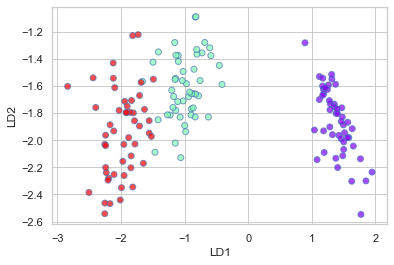

In [11]:
le = LabelEncoder()
y = le.fit_transform(df['class'])
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

### Principal Component Analysis (PCA) ###

[4.2001 0.2411 0.0777 0.0237]


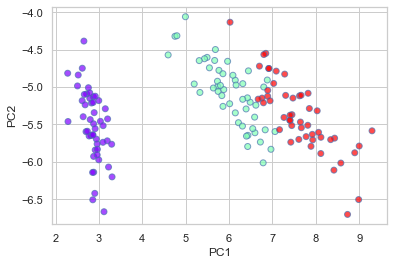

In [12]:
meanmat1=np.mean(X,axis=0)
subs1=X-meanmat1
subs1.shape
covm=np.dot(subs1.T,subs1)
cov1=covm/X.shape[0]
eig1,eigv1=np.linalg.eig(cov1)
result=np.dot(X,eigv1)
eigv1_1=eigv1[:,[0,1]] 
print(eig1)
result1=np.dot(X,eigv1_1)
#plt.scatter(result1[:, 0], result1[:, 1], color=colors)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(
    result1[:, 0],
    result1[:, 1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

### Combination of PCA and LDA ###

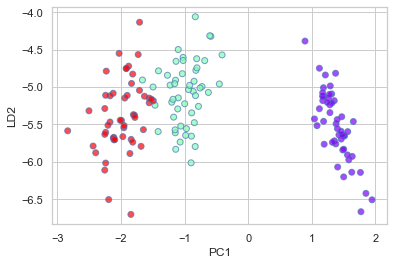

In [13]:
plt.xlabel('PC1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    result1[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

### Interpretting results of PCA, LDA and Combination of PCA and LDA ###

Text(0.5, 0, 'Linear Discriminant 1')

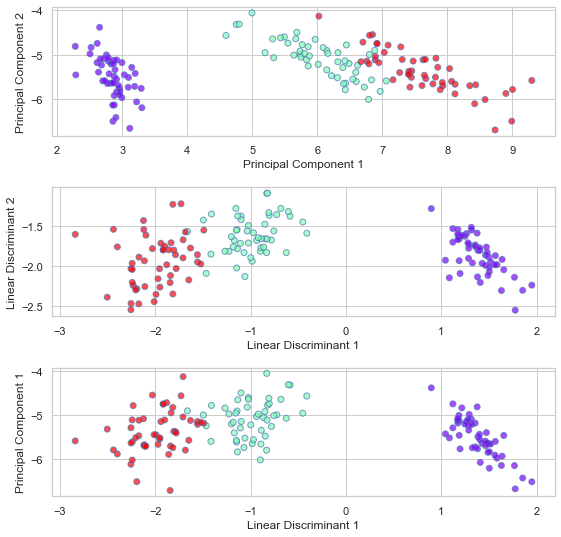

In [14]:
fig, axs = plt.subplots(3,figsize=(9,9),gridspec_kw={'wspace':0.5, 'hspace':0.4})
axs[2].scatter(X_lda[:,0],
    result1[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
axs[2].set_xlabel('Linear Discriminant 1',size=12)
axs[2].set_ylabel('Principal Component 1',size=12)
axs[0].scatter(result1[:,0],
    result1[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
axs[0].set_ylabel('Principal Component 2',size=12)
axs[0].set_xlabel('Principal Component 1',size=12)
axs[1].scatter(X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
axs[1].set_ylabel('Linear Discriminant 2',size=12)
axs[1].set_xlabel('Linear Discriminant 1',size=12)